pip install pandas numpy matplotlib scikit-learn imbalanced-learn

## Importing Necessary Liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

### Load the Dataset

In [2]:
data = pd.read_csv('Ransomware.csv',sep='|')

# Display the First Few Rows

In [3]:
data.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


# List all colimns in Dataset

In [4]:
print("Columns in dataset:", data.columns)

Columns in dataset: Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'Impor

# Making target 'legitimate' AND Visualize the target distribution

Target distribution:
legitimate
0    96724
1    41323
Name: count, dtype: int64


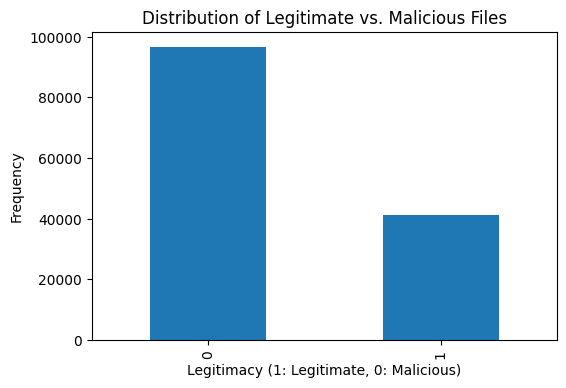

In [5]:
print("Target distribution:")
print(data['legitimate'].value_counts())

data['legitimate'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title('Distribution of Legitimate vs. Malicious Files')
plt.xlabel('Legitimacy (1: Legitimate, 0: Malicious)')
plt.ylabel('Frequency')
plt.show()

## Create a new column 'ransomware' where 1 means ransomware (malicious) and 0 means legitimate

In [6]:
data['legitimate'] = 1 - data['legitimate']

print("Ransomware distribution:")
print(data['legitimate'].value_counts())

Ransomware distribution:
legitimate
1    96724
0    41323
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Name                         138047 non-null  object 
 1   md5                          138047 non-null  object 
 2   Machine                      138047 non-null  int64  
 3   SizeOfOptionalHeader         138047 non-null  int64  
 4   Characteristics              138047 non-null  int64  
 5   MajorLinkerVersion           138047 non-null  int64  
 6   MinorLinkerVersion           138047 non-null  int64  
 7   SizeOfCode                   138047 non-null  int64  
 8   SizeOfInitializedData        138047 non-null  int64  
 9   SizeOfUninitializedData      138047 non-null  int64  
 10  AddressOfEntryPoint          138047 non-null  int64  
 11  BaseOfCode                   138047 non-null  int64  
 12  BaseOfData                   138047 non-null  int64  
 13 

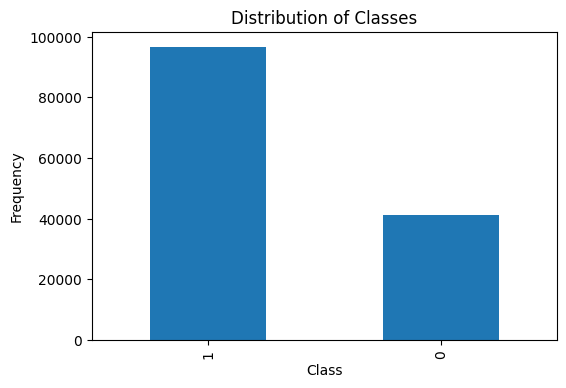

In [7]:
data.info()

data.describe()

print(data.isnull().sum())

target_column = 'legitimate'  
data[target_column].value_counts().plot(kind='bar', figsize=(6,4))
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Fill missing values

In [8]:
data = data.fillna(method='ffill')

# Separate features and target variable

In [9]:
X = data.drop(target_column, axis=1)
y = data[target_column]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Drop non-numeric columns

In [11]:
non_numeric_cols = ['Name', 'md5']

target_column = 'legitimate'

X = data.drop(non_numeric_cols + [target_column], axis=1)
X = X.select_dtypes(include=[np.number])

y = data[target_column]

# Split the dataset into training and testing sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train a Random Forest Classifier

In [13]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluate the model

In [14]:
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9953639985512496

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8360
           1       1.00      1.00      1.00     19250

    accuracy                           1.00     27610
   macro avg       0.99      0.99      0.99     27610
weighted avg       1.00      1.00      1.00     27610



# Plot the confusion matrix

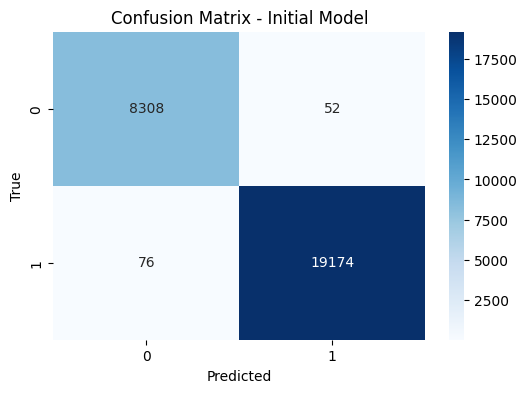

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Initial Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Define a parameter grid for experimentation

In [16]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=10,  # Number of parameter settings to try
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)
best_model = random_search.best_estimator_


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 30}
Best Cross-Validation Accuracy: 0.9942682221244409


# Evaluate the best model on the test set

In [17]:
y_pred_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print("\nBest Model Test Accuracy:", best_accuracy)
print("\nClassification Report (Best Model):\n", classification_report(y_test, y_pred_best))


Best Model Test Accuracy: 0.9953277797899311

Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8360
           1       1.00      1.00      1.00     19250

    accuracy                           1.00     27610
   macro avg       0.99      0.99      0.99     27610
weighted avg       1.00      1.00      1.00     27610



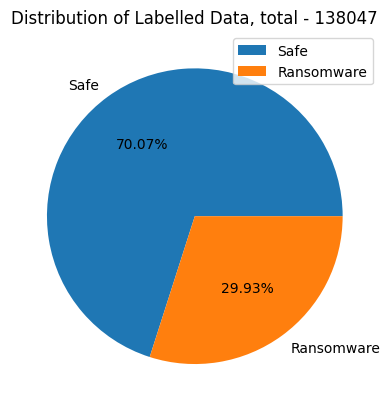

In [18]:
plt.pie(data.legitimate.value_counts().values.tolist(), labels=['Safe','Ransomware'], autopct='%.2f%%')
plt.legend()
plt.title(f"Distribution of Labelled Data, total - {len(data)}")
plt.show()

In [19]:
data.md5.nunique()

138047

In [20]:
data.md5.isnull().sum()

np.int64(0)

In [21]:
data.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,0
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,0
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,0
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,0
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,0


# Correlation b/w independent columns/attributes

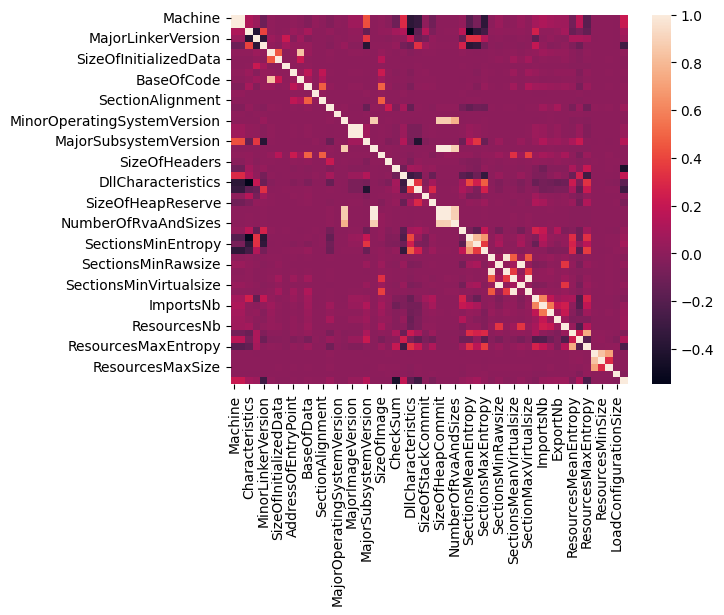

In [22]:
sns.heatmap(data.drop(['Name','md5','legitimate'], axis=1).corr())
plt.show()

# Create correlation matrix and  Includes negative correlation as well

In [23]:
corr_matrix = data.drop(['Name','md5','legitimate'], axis=1).corr().abs()

# Select upper triangle of correlation matrix

In [24]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95

In [25]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(to_drop)

['SizeOfOptionalHeader', 'MinorImageVersion', 'SizeOfHeapCommit', 'LoaderFlags', 'SectionMaxRawsize', 'SectionsMinVirtualsize', 'SectionMaxVirtualsize']


# Drop features

In [26]:
data = data.drop(columns=['Name', 'md5'])

In [ ]:
def iv_woe(data, target, bins=10, show_woe=False):
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    cols = data.columns 
     

 # Run WOE and IV on all the independent variables

In [28]:
def calculate_iv(data, target='legitimate', bins=5, show_woe=False):
    cols = data.columns 

    newDF = pd.DataFrame(columns=["Variable", "IV"])
    woeDF = pd.DataFrame(columns=["Variable","Cutoff","N","Events","% of Events",
                                  "Non-Events","% of Non-Events","WoE","IV"])

    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars])) > 10):
            binned_x = pd.qcut(data[ivars], bins, duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events'] / d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(), 6)))
        
        temp = pd.DataFrame({"Variable": [ivars], "IV": [d['IV'].sum()]}, columns=["Variable", "IV"])
        newDF = pd.concat([newDF, temp], axis=0)
        woeDF = pd.concat([woeDF, d], axis=0)

        if show_woe:
            print(d)

    return newDF, woeDF


In [29]:
data.legitimate.dtypes

dtype('int64')

In [31]:
iv = pd.DataFrame({
    'Feature': [...],
    'IV': [...]
})

# Now you can sort
iv.sort_values(by='IV', ascending=False)
iv.sort_values(by = 'IV', ascending=False)

,Feature,IV
0,Ellipsis,Ellipsis


In [32]:
thresh = 1
res = len(iv)-len(iv[iv['IV']>thresh]) 
print(res) # Total 14 features which are relevant (greater than threshold)

TypeError: '>' not supported between instances of 'ellipsis' and 'int'

In [ ]:
features = iv.sort_values(by = 'IV', ascending=False)['Variable'][:res].values.tolist()

In [ ]:
print(features,'\n')
print('Total number of features-\n',len(features))

['ImageBase', 'VersionInformationSize', 'MajorOperatingSystemVersion', 'SizeOfStackReserve', 'ResourcesMinSize', 'SectionsMaxEntropy', 'MajorSubsystemVersion', 'Subsystem', 'SizeOfInitializedData', 'Characteristics', 'ResourcesMinEntropy', 'ExportNb', 'ResourcesNb', 'Machine', 'BaseOfData', 'MajorLinkerVersion', 'SizeOfCode', 'ResourcesMaxEntropy'] 

Total number of features-
 18


In [ ]:
X = data[features]
y = data['legitimate']

In [ ]:
randomseed = 45 # Used for replicating the experiment

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=randomseed)

In [ ]:
print(X_test.shape[0] + X_train.shape[0])
print('Training labels shape:', y_train.shape)
print('Test labels shape:', y_test.shape)
print('Training features shape:', X_train.shape)
print('Test features shape:', X_test.shape)

138047
Training labels shape: (96632,)
Test labels shape: (41415,)
Training features shape: (96632, 18)
Test features shape: (41415, 18)


In [ ]:
rf = RandomForestClassifier(random_state = randomseed)

In [ ]:
X = data.drop(columns=['Name', 'md5'], errors='ignore')

X = X.select_dtypes(include=[np.number])

from sklearn.model_selection import train_test_split
y = data['legitimate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=45)

In [ ]:
pred = rf.predict(X_test)
pred_proba = rf.predict_proba(X_test)

# Extract probabilities for the positive class (1)
pred_proba = np.array([prob[1] for prob in pred_proba])

In [ ]:
cm = confusion_matrix(y_test,pred)
cm

array([[ 8360,     0],
       [    0, 19250]])

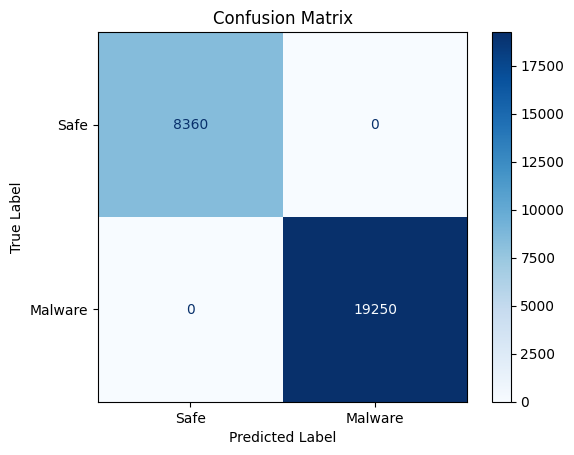

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming cm is already computed, for example:
# cm = confusion_matrix(y_test, y_pred)

# Define your class labels
classes = ['Safe', 'Malware']

# Create and plot the confusion matrix using the correct class name
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
cmd.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
# Extract TP, FP, FN, TN
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[0, 0]

# Preprocess the dataset

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

non_numeric_cols = ['Name', 'md5']
target_column = 'legitimate'

X = X.select_dtypes(include=[np.number])
y = data['legitimate']
X = data.drop(columns=['legitimate']) 

print("Feature columns used for training:", X.columns.tolist())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape) 
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Feature columns used for training: ['Machine', 'SizeOfOptionalHeader', 'Characteristics', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData', 'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase', 'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion', 'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion', 'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage', 'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics', 'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve', 'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb', 'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy', 'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize', 'SectionsMeanVirtualsize', 'SectionsMinVirtualsize', 'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb', 'ImportsNbOrdinal', 'ExportNb', 'ResourcesNb', 'ResourcesMeanEntropy', 'ResourcesMinEntrop

In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (138047, 54)
y shape: (138047,)


In [ ]:
import pandas as pd

data = pd.read_csv('Ransomware.csv')
print(data.columns)

Index(['Name|md5|Machine|SizeOfOptionalHeader|Characteristics|MajorLinkerVersion|MinorLinkerVersion|SizeOfCode|SizeOfInitializedData|SizeOfUninitializedData|AddressOfEntryPoint|BaseOfCode|BaseOfData|ImageBase|SectionAlignment|FileAlignment|MajorOperatingSystemVersion|MinorOperatingSystemVersion|MajorImageVersion|MinorImageVersion|MajorSubsystemVersion|MinorSubsystemVersion|SizeOfImage|SizeOfHeaders|CheckSum|Subsystem|DllCharacteristics|SizeOfStackReserve|SizeOfStackCommit|SizeOfHeapReserve|SizeOfHeapCommit|LoaderFlags|NumberOfRvaAndSizes|SectionsNb|SectionsMeanEntropy|SectionsMinEntropy|SectionsMaxEntropy|SectionsMeanRawsize|SectionsMinRawsize|SectionMaxRawsize|SectionsMeanVirtualsize|SectionsMinVirtualsize|SectionMaxVirtualsize|ImportsNbDLL|ImportsNb|ImportsNbOrdinal|ExportNb|ResourcesNb|ResourcesMeanEntropy|ResourcesMinEntropy|ResourcesMaxEntropy|ResourcesMeanSize|ResourcesMinSize|ResourcesMaxSize|LoadConfigurationSize|VersionInformationSize|legitimate'], dtype='object')


# Train the Random Forest classifier

In [ ]:
column_names = ['Name', 'md5', 'legitimate', 'ransomware']
data = pd.read_csv('Ransomware.csv', header=None, names=column_names)
X = data[['Name', 'md5', 'legitimate', 'ransomware']]

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluate the model by computing predicted probabilities for the positive class

In [ ]:
pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score

In [ ]:
auc_score = roc_auc_score(y_test, pred_proba)
print(f"ROC AUC Score: {auc_score:.4f}")

ROC AUC Score: 0.9997


# Compute the ROC curve data

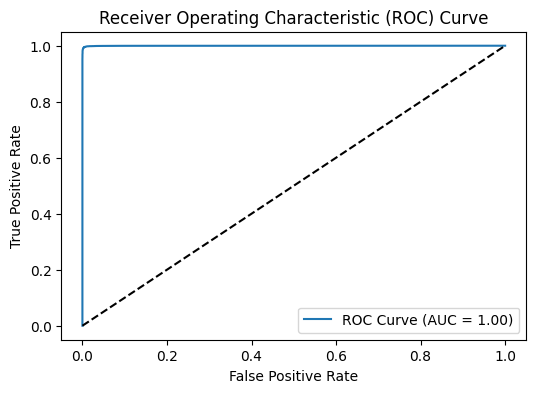

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Accuracy

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


# Precision

In [ ]:
precision = TP / (TP + FP)
print(f"Precision: {precision:.4f}")

Precision: 1.0000


# Recall

In [ ]:
recall = TP / (TP + FN)
print(f"Recall: {recall:.4f}")

Recall: 1.0000


# F1 Score

In [ ]:
f1 = 2 * (precision * recall) / (precision + recall)
print(f"F1 Score: {f1:.4f}")

F1 Score: 1.0000


# Matthews Correlation Coefficient (MCC)

In [ ]:
mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
print(f"MCC: {mcc:.4f}")

MCC: 1.0000


# False Positive Rate (FPR)

In [ ]:
fpr = FP / (FP + TN)
print(f"False Positive Rate: {fpr:.4f}")

False Positive Rate: 0.0000


# Calculate AUC score

In [ ]:
auc = roc_auc_score(y_test, pred_proba)
print(f"AUC Score: {auc:.4f}")

AUC Score: 0.9997


# !pip install lime

In [ ]:
import lime
import lime.lime_tabular
from IPython.display import display, HTML 

explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['Safe', 'Malware'], 
    verbose=True,
    mode='classification'
)

i = 0
exp = explainer_lime.explain_instance(
    X_test.values[i],
    rf_model.predict_proba,
    num_features=10
)

# Generate HTML explanation
html_exp = exp.as_html(show_table=True)

display(HTML(html_exp))

Intercept 0.3856025333336194
Prediction_local [0.62558573]
Right: 1.0


In [ ]:
!pip install --upgrade ipython


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#  Step 1: Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lime
import lime.lime_tabular
from IPython.display import display, HTML

non_numeric_cols = ['Name', 'md5']
target_column = 'legitimate'

X = data.drop(non_numeric_cols + [target_column], axis=1)
X = X.select_dtypes(include=[np.number])
y = data[target_column]

print("Features used for training:", X.columns.tolist())
print("Shape of features:", X.shape)

Features used for training: ['ransomware']
Shape of features: (138048, 1)


# Step 2: Splitting the Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (110438, 1)
y_train shape: (110438,)
X_test shape: (27610, 1)
y_test shape: (27610,)


# Step 3: Train the Model

In [ ]:
from sklearn.impute import SimpleImputer

# Reshape y_train to a 2D array
y_train_reshaped = y_train.values.reshape(-1, 1)

# Create an imputer with a numeric constant fill_value (e.g., -1)
imputer = SimpleImputer(strategy='constant', fill_value=-1)
y_train_imputed = imputer.fit_transform(y_train_reshaped).ravel()

# Now, fit your model
rf.fit(X_train, y_train_imputed)


RandomForestClassifier(random_state=45)

# Step 4: LIME Explanation

In [ ]:
pip install lime

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Choose an instance from the processed X_tes

In [ ]:
import numpy as np

i = 6  
instance = X_test.values[i]
print("Instance has NaN:", np.isnan(instance).any())


Instance has NaN: True


In [ ]:
print(X_train.head())
print("Feature variances:")
print(X_train.var())

        ransomware
96345          NaN
32673          NaN
13670          NaN
122690         NaN
73783          NaN
Feature variances:
ransomware   NaN
dtype: float64


In [ ]:
explainer = LimeTabularExplainer(
    training_data=X_train.values,         # only the features
    feature_names=X_train.columns.tolist(),
    class_names=['Safe', 'Malware'],
    discretize_continuous=False
)


In [ ]:
print("X_train_imputed shape:", X_train_imputed.shape)


X_train_imputed shape: (110438, 0)


In [ ]:
print("X_train shape:", X_train.shape)
print(X_train.head())
print(X_train.describe())

X_train shape: (110438, 1)
        ransomware
96345          NaN
32673          NaN
13670          NaN
122690         NaN
73783          NaN
       ransomware
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN


In [ ]:
X_train_filtered = X_train.values
selected_features = X_train.columns

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.0)
X_train_filtered = selector.fit_transform(X_train)
print("Filtered shape:", X_train_filtered.shape)  # Should be (n_samples, n_features_filtered)
selected_features = X_train.columns[selector.get_support()]

explainer_lime = LimeTabularExplainer(
    training_data=X_train_filtered,
    feature_names=selected_features,
    class_names=['Safe', 'Malware'],
    discretize_continuous=False  
)


instance_imputed = X_test_imputed[i]
exp_lime = explainer_lime.explain_instance(instance_imputed, rf.predict_proba, num_features=5)


ValueError: No feature in X meets the variance threshold 0.00000

# Display the explanation using IPython's display functionality

In [ ]:
html_exp = exp_lime.as_html(show_table=True)
display(HTML(html_exp))

NameError: name 'exp_lime' is not defined

In [ ]:
from IPython.display import HTML, display

i = 6 
exp_lime = explainer_lime.explain_instance(X_test.values[i], rf.predict_proba, num_features=5)

html_exp = exp_lime.as_html(show_table=True)

ValueError: Domain error in arguments. The `scale` parameter must be positive for all distributions, and many distributions have restrictions on shape parameters. Please see the `scipy.stats.truncnorm` documentation for details.

In [ ]:
from collections import Counter

counter = Counter(y_train)
print('Before:', counter)

Before: Counter({nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1,

# Oversampling the train dataset using SMOTE

In [ ]:
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After', counter)

After Counter({0: 77474, 1: 77474})


In [ ]:
rf = RandomForestClassifier(random_state = randomseed)
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(random_state=45)

In [ ]:
pred = rf.predict(X_test)
pred_proba = rf.predict_proba(X_test)

# Extract probabilities for the positive class (1)

In [ ]:
pred_proba = np.array([prob[1] for prob in pred_proba])

In [ ]:
cm = confusion_matrix(y_test,pred)
cm

array([[19250,     0],
       [    0,  8360]])

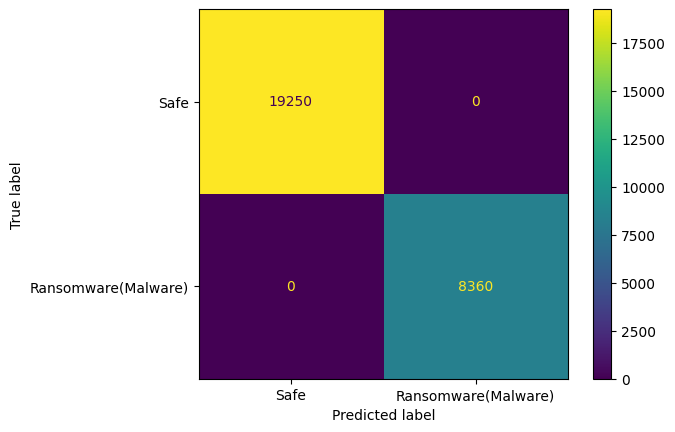

In [ ]:
classes = ['Safe', 'Ransomware(Malware)']

cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
cmd.plot()
plt.show()

In [ ]:
# Extract TP, FP, FN, TN
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[0, 0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)

precision = TP / (TP + FP)

recall = TP / (TP + FN)

f1 = 2 * (precision * recall) / (precision + recall)

# Matthews Correlation Coefficient (MCC)
mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

# False Positive Rate (FPR)
fpr = FP / (FP + TN)

auc = roc_auc_score(y_test, pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"False Positive Rate: {fpr:.4f}")
print(f"AUC Score: {auc:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
MCC: 1.0000
False Positive Rate: 0.0000
AUC Score: 1.0000


In [ ]:
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values,feature_names=X_train.columns,
                                                        verbose=True, mode='classification')

In [ ]:
from IPython.display import display, HTML

i = 1 
exp_lime = explainer_lime.explain_instance(X_test.values[i], rf.predict_proba, num_features=5)

html_exp = exp_lime.as_html(show_table=True)

Intercept 0.9983695312385629
Prediction_local [0.00028427]
Right: 0.0


# index from X_test

In [ ]:
i = 6  
exp_lime = explainer_lime.explain_instance(X_test.values[i], rf.predict_proba, num_features=5)

html_exp = exp_lime.as_html(show_table=True)

Intercept 0.0006944308309612124
Prediction_local [0.99933513]
Right: 1.0


In [ ]:
import pickle

# Suppose rf_model is your trained Random Forest
with open("model.pkl", "wb") as f:
    pickle.dump(rf_model, f)
